# Bike Sharing Assignment
#### Build a multiple linear regression model for the prediction of demand for shared bikes.


In [218]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [219]:
# Import essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading and Understanding the Data

In [220]:
df = pd.read_csv("day.csv")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [221]:
df.shape

(730, 16)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [223]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Classifying the columns


In [224]:
# List of Categorical variables in the dataset:
# season, yr, mnth, holiday, weekday, workingday, weathersit

# List of Numerical variables in the dataset:
# instant, temp, atemp, hum, windspeed, casual, registered, cnt

### Removing/Replacing null data


In [225]:
# Looking at df.info() above, this step is not needed as all columns have non-null values

### Removing Outliers

In [226]:
# We'll remove the outliers in all numerical columns using:
# df[(np.abs(stats.zscore(df['column_name'])) < 3)]

# We'll check the shape of the dataframe after each step.
# If the size of the dataframe hasn't changed, it means no outliers were found

In [227]:
df = df[(np.abs(stats.zscore(df['temp'])) < 3)]
df.shape

(730, 16)

In [228]:
df = df[(np.abs(stats.zscore(df['atemp'])) < 3)]
df.shape

(730, 16)

In [229]:
df = df[(np.abs(stats.zscore(df['hum'])) < 3)]
df.shape

(728, 16)

In [230]:
df = df[(np.abs(stats.zscore(df['windspeed'])) < 3)]
df.shape

(725, 16)

In [231]:
df = df[(np.abs(stats.zscore(df['cnt'])) < 3)]
df.shape

(725, 16)

In [232]:
# Observation:

# As seen above, two ouliers were removed from humidity and three were removed from windspeed

### Dropping irrelevant columns

In [233]:
# instant and raw date will not have an impact on the predictions

# casual & registered are not needed as the total count of customers (cnt) is what we need
# Also, There is no way to know how many casual/registered users will be coming. If we use them in training,
# they will give erroneous results (will cause data leakage).

# atemp is what the temperature feels like on a day. It is the value of temperature affected by other factors
# such as humidity and windspeed. Since we are already considering temp, hum and windspeed, it might be safe to drop atemp.
# Since we are not quite sure, we'll re-visit this variable later.

# Create a new dataframe bb without these variables

bb = df.drop(['instant','dteday','casual','registered'],axis=1)

In [234]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [235]:
bb.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,2.504828,0.500690,6.543448,0.028966,2.984828,0.684138,1.394483,20.341627,23.750374,62.951486,12.661751,4519.004138
std,1.107005,0.500345,3.446489,0.167825,2.005804,0.465179,0.542628,7.522706,8.164576,13.970282,5.046105,1932.901983
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,25.416700,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.803347,16.887300,52.208300,9.000914,3194.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.602500,24.462900,62.750000,12.041843,4553.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.889153,30.524400,73.041700,15.583932,5986.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,27.999836,8714.000000


In [236]:
# Replacing numbers in categorical variables with appropriate strings
# (Provided data dictionary is referred for the interpretation)

bb['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bb['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bb['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bb.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1080x2160 with 0 Axes>

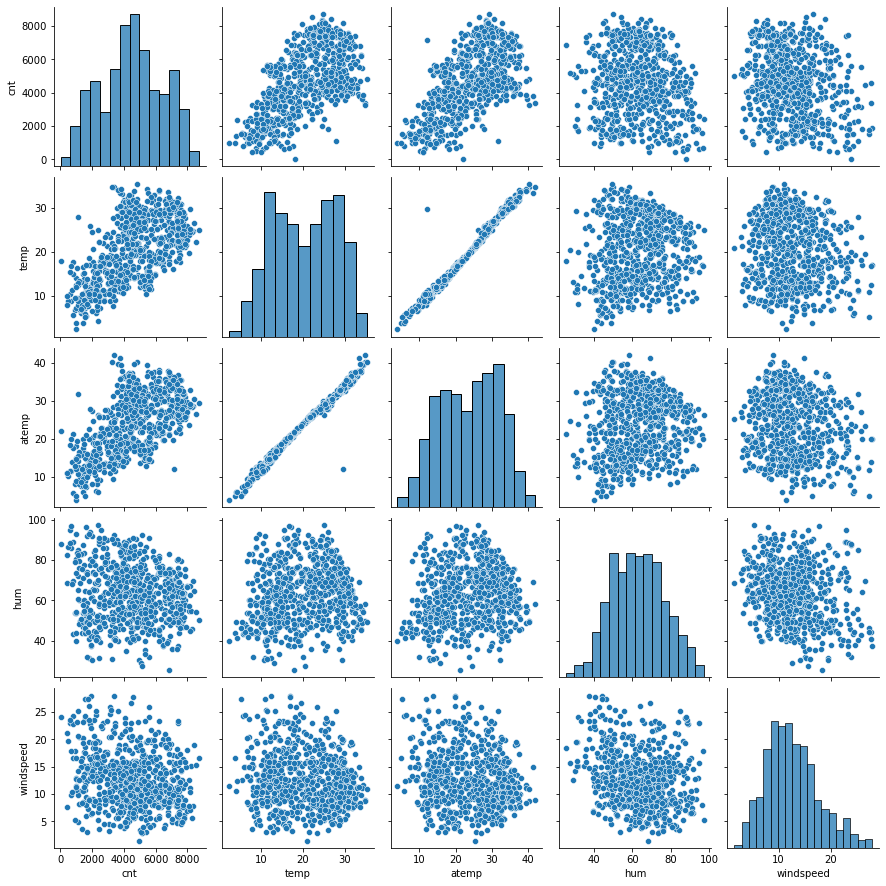

In [237]:
#Draw pairplots for continuous numeric variables using seaborn

plt.figure(figsize = (15,30))
sns.pairplot(data=bb,vars=['cnt', 'temp','atemp','hum','windspeed'])
plt.show()

In [238]:
# Observation:

# It looks like cnt has a linear relationship with temp and atemp

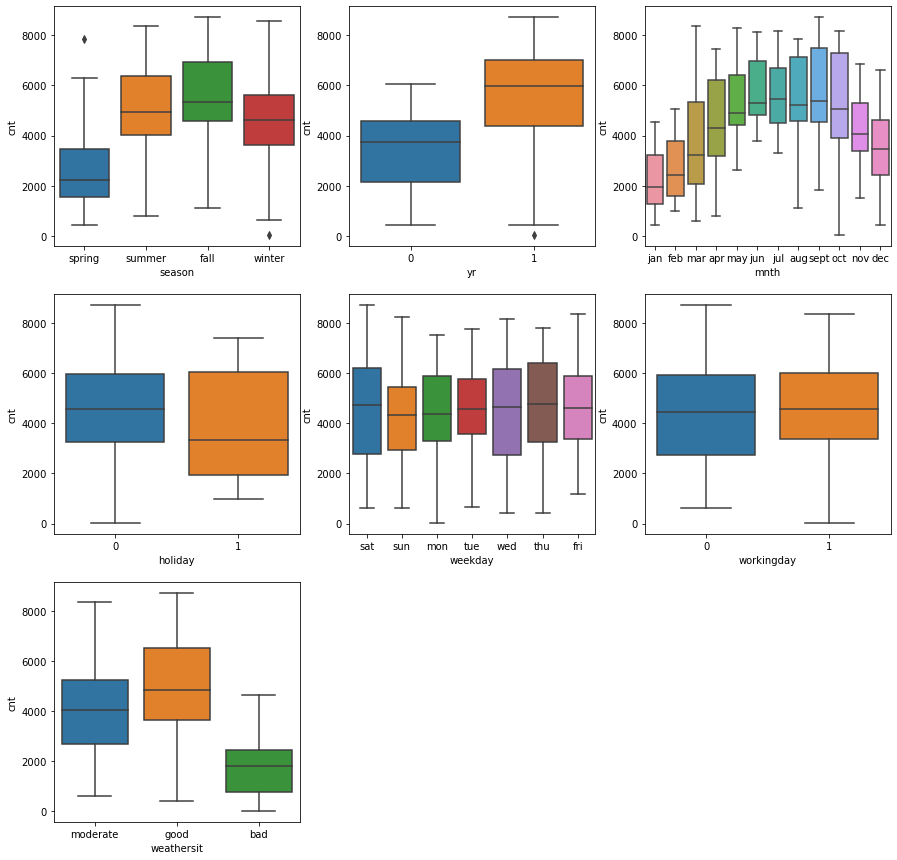

In [239]:
# Boxplot for categorical variables

cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bb, x=i[1], y='cnt')
plt.show()

In [240]:
# Observation:

# Weathersit: Looks like the demand for bikes is the highest in good weather and least in bad weather
# Weekday and workingday show comparable demand for bikes. The day of the week on its own doesn't have much impact on demand
# Holiday : Holidays shows lesser demand for bikes
# Season : The demand is the least in spring
# year : The demand for bikes has increased signoficantly in 2019 compared to 2018

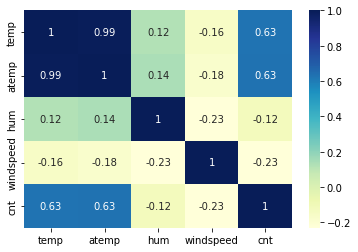

In [241]:
# Construct a heatmap to see correlations between categorical variables

sns.heatmap(bb[['temp','atemp','hum','windspeed','cnt']].corr(),annot = True, cmap="YlGnBu")
plt.show()

In [242]:
# Observation:

# cnt has a good corrrelation with temp and atemp
# atemp and temp have a very high correlation. We can drop one.

In [243]:
bb.drop(['atemp'],axis=1,inplace=True)

## Preparing Data for Modelling
- Encoding:
    - Converting binary variables to 1/0 (No need to do this : Already present in the dataset)
    - Other categorical variables to dummy variables


#### Creating dummy variables


In [244]:
# Already in Binary Format: yr, holiday, workingday
# Numerical Categorical: season, mnth, weekday, weathersit

# Creating dummy variables with one-hot-encoding
bb = pd.get_dummies(data=bb,columns=["season","mnth","weekday","weathersit"])

In [245]:
bb.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Build Linear Regression Model

#### Splitting data into training and test set

In [246]:
bb.shape

(725, 33)

In [247]:
bb_old = bb.copy()
y = bb.pop('cnt')
X = bb

# Split the data in 70-30 ratio (Training : 70%, Test : 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [248]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [249]:
X_train.shape

(507, 32)

In [250]:
X_test.shape

(218, 32)

### Feature Scaling

In [251]:
# Normalize all data so that the min value of all columns will be 0 and max value will be 1

scaler = MinMaxScaler()

# Apply scaler to all numerical columns
num_vars = ['temp','hum','windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
bb_old[num_vars] = scaler.fit_transform(bb_old[num_vars])

In [252]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.522682,0.029586,0.698225,0.554952,0.526909,0.426344,0.266272,0.228797,0.256410,0.248521,0.090730,0.076923,0.076923,0.069034,0.094675,0.094675,0.084813,0.053254,0.090730,0.078895,0.102564,0.086785,0.155819,0.143984,0.142012,0.130178,0.138067,0.136095,0.153846,0.033531,0.641026,0.325444
std,0.499979,0.169609,0.459482,0.226091,0.190943,0.196242,0.442445,0.420473,0.437082,0.432582,0.287508,0.266733,0.266733,0.253762,0.293054,0.293054,0.278878,0.224762,0.287508,0.269842,0.303688,0.281798,0.363041,0.351420,0.349407,0.336831,0.345311,0.343228,0.361158,0.180195,0.480173,0.469003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355689,0.386021,0.283222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.566998,0.529003,0.397141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746636,0.662123,0.545092,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [253]:
# Observation:
# Scaling is successful as all data is now normalized (lies between 0 and 1)

In [254]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
330,0,0,0,0.498465,0.618329,0.474668,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
452,1,0,1,0.542077,0.257541,0.756311,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
106,0,0,0,0.495350,0.313804,0.715210,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
116,0,0,1,0.698871,0.809165,0.737356,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
655,1,0,1,0.577381,0.660092,0.545865,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [255]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_apr', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [256]:
def find_corr(cols):
    for col in cols:
        print(col, " : ", bb_old['cnt'].corr(bb_old[col]))

In [257]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_apr', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate']
find_corr(cols)

yr  :  0.5701707228374624
holiday  :  -0.07010218606950563
workingday  :  0.05983264290287884
temp  :  0.6267908792701924
hum  :  -0.12211856700113079
windspeed  :  -0.2302867258401248
season_fall  :  0.3447066199623777
season_spring  :  -0.559949183669454
season_summer  :  0.14290972987069422
season_winter  :  0.06242697235205934
mnth_apr  :  -0.0053034901576392976
mnth_aug  :  0.18133929273802382
mnth_dec  :  -0.17655532833410081
mnth_feb  :  -0.2689175999216306
mnth_jan  :  -0.3708849730739818
mnth_jul  :  0.16539007968406705
mnth_jun  :  0.19490877759600125
mnth_mar  :  -0.12499076118854448
mnth_may  :  0.13152545215899886
mnth_nov  :  -0.04227049998275031
mnth_oct  :  0.10932181769273817
mnth_sept  :  0.19399905170042436
weekday_fri  :  0.03628928196367517
weekday_mon  :  -0.03853718884560769
weekday_sat  :  0.016327474938993617
weekday_sun  :  -0.0618229229411325
weekday_thu  :  0.03871955135225462
weekday_tue  :  -0.0017671036730224382
weekday_wed  :  0.011774437265154626
weathe

In [258]:
bb_old.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
yr,1.000000,0.007986,-0.002030,0.048643,-0.123087,-0.009497,0.570171,-0.000816,-0.000781,-0.000804,0.002427,-0.000414,-0.000422,-0.000422,-0.000391,-0.000422,-0.000422,-0.000414,-0.000414,-0.000422,-0.000414,0.004551,-0.000414,-0.000564,0.003352,-0.004512,0.003352,0.003428,-0.000564,-0.004512,-0.067605,0.029669,-0.006815
holiday,0.007986,1.000000,-0.254183,-0.029319,-0.018323,0.009955,-0.070102,-0.027127,0.036486,-0.025129,0.016716,0.007823,-0.052816,0.006004,0.013653,0.035413,0.006004,-0.051879,-0.051879,0.006004,0.067525,0.006906,0.007823,-0.023754,0.279468,-0.070282,-0.071076,-0.021982,-0.047217,-0.046725,-0.029090,0.029092,-0.019551
workingday,-0.002030,-0.254183,1.000000,0.050899,0.018616,-0.011480,0.059833,0.016128,-0.023587,0.014445,-0.007546,-0.011289,0.038021,-0.015030,0.011940,-0.025640,-0.015030,0.021019,0.021019,0.006191,-0.011289,-0.007829,-0.011289,0.261136,0.153157,-0.598889,-0.605650,0.256229,0.269601,0.268004,0.023864,-0.055527,0.048267
temp,0.048643,-0.029319,0.050899,1.000000,0.123278,-0.155395,0.626791,0.678229,-0.620740,0.153525,-0.227914,-0.042821,0.354318,-0.287042,-0.308575,-0.433121,0.432520,0.307921,-0.176694,0.164549,-0.207920,-0.018142,0.197157,-0.001223,-0.006033,-0.025386,-0.028077,0.020622,0.018178,0.022293,-0.055557,0.115868,-0.098726
hum,-0.123087,-0.018323,0.018616,0.123278,1.000000,-0.229375,-0.122119,0.016814,-0.166957,-0.010721,0.160344,-0.089187,0.017995,0.080008,-0.114277,-0.095693,-0.069303,-0.115560,-0.066446,0.130208,-0.009980,0.141530,0.183314,-0.046195,0.023764,-0.010470,-0.005471,-0.039856,0.036098,0.041698,0.315854,-0.591716,0.493057
windspeed,-0.009497,0.009955,-0.011480,-0.155395,-0.229375,1.000000,-0.230287,-0.132753,0.160668,0.112556,-0.138948,0.181595,-0.065266,-0.050270,0.068458,0.070379,-0.093136,-0.014214,0.117405,-0.024348,-0.020673,-0.071789,-0.091938,-0.014097,0.009346,0.012992,-0.002469,-0.015143,0.015464,-0.006278,0.119564,-0.017051,-0.024003
cnt,0.570171,-0.070102,0.059833,0.626791,-0.122119,-0.230287,1.000000,0.344707,-0.559949,0.142910,0.062427,-0.005303,0.181339,-0.176555,-0.268918,-0.370885,0.165390,0.194909,-0.124991,0.131525,-0.042270,0.109322,0.193999,0.036289,-0.038537,0.016327,-0.061823,0.038720,-0.001767,0.011774,-0.231661,0.251560,-0.175931
season_fall,-0.000816,-0.027127,0.016128,0.678229,0.016814,-0.132753,0.344707,1.000000,-0.335013,-0.345066,-0.336270,-0.177728,0.516830,-0.180938,-0.167852,-0.180938,0.516830,0.050734,-0.177728,-0.180938,-0.177728,-0.179338,0.324890,0.000285,-0.010978,0.002624,-0.010978,0.016448,0.000285,0.002624,-0.022794,0.110860,-0.104961
season_spring,-0.000781,0.036486,-0.023587,-0.620740,-0.166957,0.160668,-0.559949,-0.335013,1.000000,-0.330203,-0.321786,-0.170073,-0.173145,0.079940,0.501032,0.540093,-0.173145,-0.170073,0.273630,-0.173145,-0.170073,-0.171613,-0.170073,0.006912,0.004665,-0.000038,0.013806,-0.014109,-0.002266,-0.009253,-0.036439,-0.022870,0.035885
season_summer,-0.000804,-0.025129,0.014445,0.153525,-0.010721,0.112556,0.142910,-0.345066,-0.330203,1.000000,-0.331441,0.515056,-0.178340,-0.178340,-0.165442,-0.178340,-0.178340,0.284979,0.077909,0.524359,-0.175176,-0.176763,-0.175176,-0.003567,0.003168,-0.001277,-0.005838,0.003358,-0.003567,0.007801,-0.040172,-0.022958,0.037266


In [259]:
# Building a linear model

# We will use RFE (Recursive Feature Elimination) for feature selection.
# It is easy to configure and use and because it is effective at selecting those features (columns) 
# in a training dataset that are most relevant in predicting the target variable.

# There are two important configuration options when using RFE: 
# 1) The choice in the number of features to select
# 2) The choice of the algorithm used to help choose features. 

# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

# Number of features selected : 15
# Algorithm used : Linear Regression
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [260]:
# Print the list of variables selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 18),
 ('season_fall', False, 8),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_apr', False, 5),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weekday_fri', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 2)]

In [261]:
# Using using statsmodel to build model from parameters selected by RFE

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [262]:
# Define function to Calculate VIFs for the columns passed

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [263]:
# Features selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [264]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'windspeed', 'season_fall', 'season_summer', 'mnth_apr',
       'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_oct',
       'weekday_fri', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [265]:
# Creating new X_Train with the 15 columns selected by RFE
X_train_rfe = X_train[['yr', 'workingday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good']]

In [266]:
X_train_rfe.shape

(507, 15)

## First Model

In [267]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'workingday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     160.1
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          5.12e-178
Time:                        14:21:51   Log-Likelihood:                -4114.5
No. Observations:                 507   AIC:                             8261.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1340.7245    267.296     

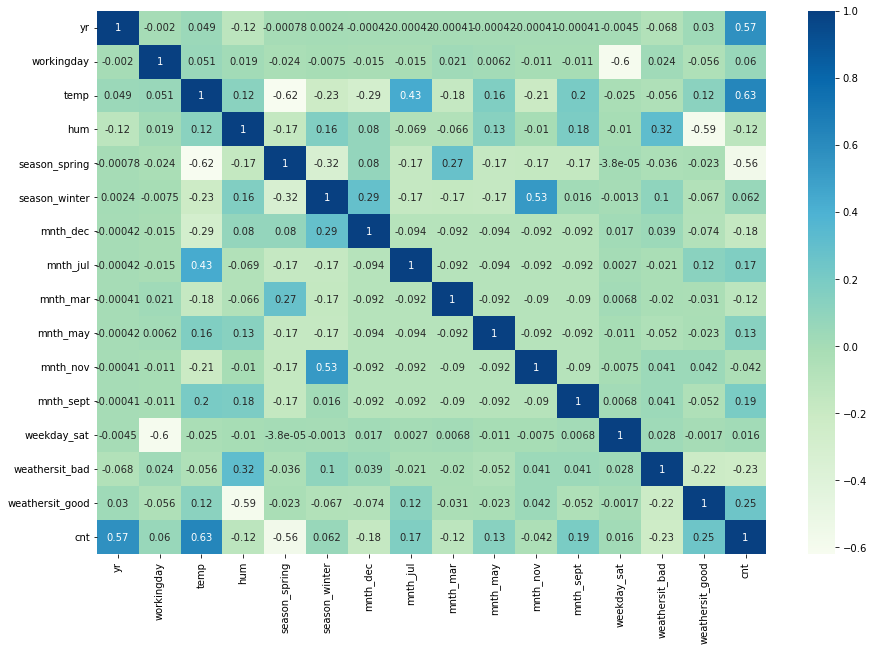

In [268]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bb_old[['yr', 'workingday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good','cnt']].corr(), cmap='GnBu', annot=True)
plt.show()

In [269]:
# Dropping weekday_sat as it very low correlation with cnt

cols = ['yr', 'workingday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.56e-175
Time:                        14:21:54   Log-Likelihood:                -4123.1
No. Observations:                 507   AIC:                             8276.
Df Residuals:                     492   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1665.6830    259.498     

In [270]:
# Dropping workingday as it very low correlation with cnt

cols = ['yr', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          8.23e-175
Time:                        14:21:54   Log-Likelihood:                -4127.5
No. Observations:                 507   AIC:                             8283.
Df Residuals:                     493   BIC:                             8342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1820.5737    256.054     

In [271]:
# Dropping mnth_nov as it very low correlation with cnt

cols = ['yr', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          3.23e-173
Time:                        14:21:54   Log-Likelihood:                -4134.0
No. Observations:                 507   AIC:                             8294.
Df Residuals:                     494   BIC:                             8349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1648.4546    254.492     

In [272]:
# Dropping season_winter as it very low correlation with cnt

cols = ['yr', 'temp', 'hum', 'season_spring',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     189.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.84e-169
Time:                        14:21:54   Log-Likelihood:                -4145.6
No. Observations:                 507   AIC:                             8315.
Df Residuals:                     495   BIC:                             8366.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2122.0252    239.966     

In [273]:
# Dropping mnth_may and mnth_dec as they have high P-value

cols = ['yr', 'temp', 'hum', 'season_spring',
       'mnth_jul', 'mnth_mar', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     229.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.14e-170
Time:                        14:21:54   Log-Likelihood:                -4148.4
No. Observations:                 507   AIC:                             8317.
Df Residuals:                     497   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2038.4537    237.910     

In [274]:
# Dropping mnth_mar as it has very low correltion with cnt

cols = ['yr', 'temp', 'hum', 'season_spring',
       'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     253.2
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          4.31e-170
Time:                        14:21:54   Log-Likelihood:                -4152.6
No. Observations:                 507   AIC:                             8323.
Df Residuals:                     498   BIC:                             8361.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2007.6147    239.418     

In [275]:
# Dropping hum as it has very low correltion with cnt

cols = ['yr', 'temp', 'season_spring',
       'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     284.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.14e-169
Time:                        14:21:54   Log-Likelihood:                -4156.5
No. Observations:                 507   AIC:                             8329.
Df Residuals:                     499   BIC:                             8363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1535.3587    170.113     

### Both VIFs and p-values are in the acceptable range so, we will go ahead and make predictions using this model

In [276]:
X_train_lm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_lm).fit()

## Residual Analysis of the train data

In [277]:
# Check if the error terms are also normally distributed (which is an assumptions of linear regression)

In [278]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

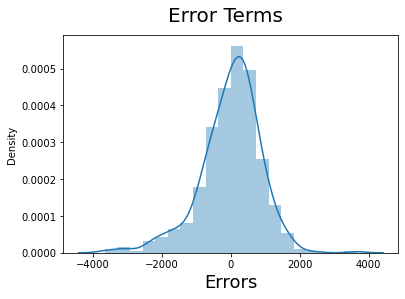

In [279]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [280]:
# Observation:

# Error terms are normally distributed.

## Making Predictions Using the Final Model

In [281]:
# Scaling the test set

num_vars = ['temp','hum','windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [282]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.449541,0.027523,0.651376,0.520299,0.512334,0.415437,0.243119,0.275229,0.247706,0.233945,0.064220,0.105505,0.105505,0.087156,0.064220,0.064220,0.077982,0.151376,0.073394,0.091743,0.041284,0.073394,0.114679,0.146789,0.142202,0.178899,0.142202,0.160550,0.114679,0.013761,0.614679,0.371560
std,0.498592,0.163978,0.477631,0.233141,0.202556,0.179596,0.429954,0.447658,0.432674,0.424312,0.245709,0.307910,0.307910,0.282713,0.245709,0.245709,0.268760,0.359240,0.261383,0.289327,0.199405,0.261383,0.319367,0.354710,0.350061,0.384150,0.350061,0.367961,0.319367,0.116767,0.487791,0.484334
min,0.000000,0.000000,0.000000,0.047675,0.030161,0.062913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324797,0.350928,0.287035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.497426,0.509571,0.415090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.668503,0.517677,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.957426,0.968097,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
lr1 = LinearRegression()
lr1.fit(X_train[cols],y_train)
print(lr1.intercept_,lr1.coef_)

1535.358746194936 [ 2074.71315244  3508.51394292 -1416.45779646  -645.69193765
   434.76840506 -1738.81050197   711.57806773]


In [284]:
# Predict the values for test data

y_test_pred = lr1.predict(X_test[cols])

In [285]:
#Print R-squared Value

r2_score(y_test,y_test_pred)

0.8247302950666527

In [287]:
# Observation:

#This is a very good gvalue for R2 and is close to R2 for training data (.800)

Text(0, 0.5, 'y_test_pred')

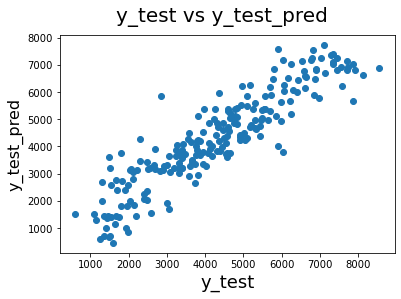

In [286]:
# Draw scatterplot to see the spread of y_test and y_test_pred

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)           
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

### The equation for our best fitted line is :

 cnt = 2074.71 * yr + 3508.51 * temp - 1416.46 * season_spring - 645.69 * mnth_jul + 434.77 * mnth_sept 
      - 1738.81 *  weathersit_bad + 711.58 * weathersit_good 

## Conclusion:
    
##### Significant variables in prediction of count of the number of boom bikes are: yr, temp, season (spring), mnth (july & september), weathersit (good & bad)
- yr (Demand for boom bikes is expected to increase next year)
- rainy season sees a decline in demand
- Demand increases when wheather is favorable for bike riders and declines in harsh weather situations.

### Recommendation
- More bikes to be kept available next year
- Measures should be taken to improve business in spring and unfavorable weather e.g. Offering Discounts during these periods
- Housekeeping can be scheduled during spring